# Musterlösung: Aufgabe 1, Übungsblatt 11

## Einführung in die Programmierung für Studierende der Physik
## (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2025)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 23.05.2025


<p>
Im Unterpunkt <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/V10/DieSchwingendeKette.html" target="_blank">Die schwingende Kette</A> der <A href="http://itp.uni-frankfurt.de/~hanauske/VPROG/index.html#V10" target="_blank">Vorlesung 10</A> behandelten wir ein schwingendes, gekoppeltes Massensystem bestehend aus einer beliebigen Anzahl von Perlen und simulierten seine Bewegung mittels des C++ Programmes <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/SchwingendeKette.cpp" target="_blank">SchwingendeKette.cpp</A> und des Jupyter Notebooks <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/SchwingendeKette.ipynb" target="_blank">SchwingendeKette.ipynb</A>.
</p>

<p>
Im Unterpunkt <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/V10/Vererbung.html" target="_blank">Abgeleitete Klassen, Vererbung von Klassenmerkmalen und Klassenhierarchien</A> der <A href="http://itp.uni-frankfurt.de/~hanauske/VPROG/index.html#V10" target="_blank">Vorlesung 10</A> konstruierten wir eine allgemeine abstrakte Basisklasse 'dsolve', die als eine Schnittstelle fungiert und die numerische L&ouml;sung eines Systems von Differentialgleichungen berechnete. Dabei wurde innerhalb der Klasse 'dsolve' eine reine virtuelle Funktion 'dgls' deklariert, welche die zugrundeliegende Bewegungsgleichung beschreiben soll. Die eigentliche Differentialgleichung wurde dann jedoch erst in einer abgeleiteten Sub-Klasse definiert (in dem Beispiel des Unterpunktes wurde die Sub-Klasse 'Pendel' entworfen). Die einzelnen Klassen wurden dabei, vom Hauptprogramm <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/Pendel.cpp" target="_blank">Pendel.cpp</A> getrennt, in der Header-Datei <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/2025/C++/Pendel.hpp" target="_blank">Pendel.hpp</A> ausgelagert.
</p>

<p>
Erstellen Sie eine, von der abstrakten Klasse 'dsolve' abgeleitete Sub-Klasse 'Kette', welche die schwingende Kette bestehend aus einer beliebigen Anzahl von Perlen simulieren kann. Die Sub-Klasse 'Kette' soll dabei so gestaltet sein, dass sie auch den Fall unterschiedlicher Massen berechnen kann. Betrachten Sie dann zun&auml;chst eine Kette bestehend aus drei Perlen der Massen $m_1=1$, $m_2=2$ und $m_3=3$ und stellen Sie die drei Eigenschwingungen des Systems als Animationen dar. Generieren Sie zus&auml;tzlich eine numerische L&ouml;sung in Python und vergleichen Sie die Ergebnisse des C++ Programms mit den Python-Simulationen. Erstellen Sie dann am Ende eine Simulation mit einer gr&ouml;&szlig;eren Anzahl an Perlen unterschiedlicher Massen.
</p>

# Die schwingende Kette mit unterschiedlichen Perlenmassen

In [3]:
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
from scipy.integrate import solve_ivp
import numpy as np
init_printing()

## Drei Perlen mit unterschiedlichen Massen 
### Bestimmung der Eigenfrequenzen und Eigenschwingungen

<p>
Im Folgenden betrachten wir zunächst eine Kette bestehend aus drei Perlen der Massen $m_1=1$, $m_2=2$ und $m_3=3$ und berechnen die drei Eigenschwingungen des Systems und stellen diese dann als Animationen dar.
Zunächst definieren wir uns das System von gekoppelten DGLs als sympy-Gleichung (beachte Fadenspannung $T=1$ und Abstand der Perlen voneinander $a=1$).
</p>

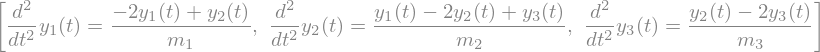

In [4]:
t= symbols('t',real=True)
m_1, m_2, m_3 = symbols('m_1, m_2, m_3', positive = True, real = True)

y_1 = Function('y_1')(t)
y_2 = Function('y_2')(t)
y_3 = Function('y_3')(t)

EQ1 = Eq(y_1.diff(t).diff(t),1/(m_1)*(y_2 - 2*y_1))
EQ2 = Eq(y_2.diff(t).diff(t),1/(m_2)*(y_1 - 2*y_2 + y_3))
EQ3 = Eq(y_3.diff(t).diff(t),1/(m_3)*(y_2-2*y_3))
[EQ1,EQ2,EQ3]

Festlegung der Massen $m_1=1$, $m_2=2$ und $m_3=3$:

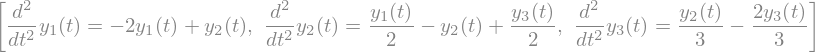

In [5]:
eqs = [EQ1.subs(m_1,1),EQ2.subs(m_2,2),EQ3.subs(m_3,3)]
eqs

Im Folgenden möchten wir die Eigenfrequenzen und Eigenschwingungen der schwingenden Kette bestimmen. Eine Eigenschwingung der Kette ist gegeben, wenn alle Perlen mit der gleichen Frequenz $\omega$ schwingen. Eine solche Schwingung liegt somit vor, falls die analytischen Lösungen die folgende Form besitzen:

\begin{equation}
y_1(t) = A \cdot \hbox{sin}(\omega \, t) \,\, , \quad 
y_2(t) = B \cdot \hbox{sin}(\omega \, t) \,\, , \quad
y_3(t) = C \cdot \hbox{sin}(\omega \, t)
\end{equation}

In [6]:
A, B, C, omega = symbols('A, B, C, omega', real = True)

Wir setzen diesen Ansatz in das folgende System von gekoppelten DGLs ein und erhalten die folgenden drei Bestimmungsgleichungen der Eigenfrequenzen:

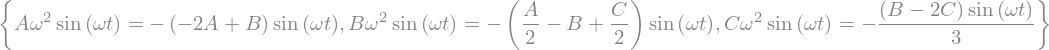

In [7]:
Eq1=eqs[0].subs({(y_1.diff(t).diff(t),-A*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_1,A*sin(omega*t))})
Eq2=eqs[1].subs({(y_2.diff(t).diff(t),-B*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_1,A*sin(omega*t)),(y_3,C*sin(omega*t))})
Eq3=eqs[2].subs({(y_3.diff(t).diff(t),-C*omega**2*sin(omega*t)),(y_2,B*sin(omega*t)),(y_3,C*sin(omega*t))})
eqs_eigen = {Eq1.simplify(),Eq2.simplify(),Eq3.simplify()}
eqs_eigen

Wir lösen dann dieses Gleichungssystem

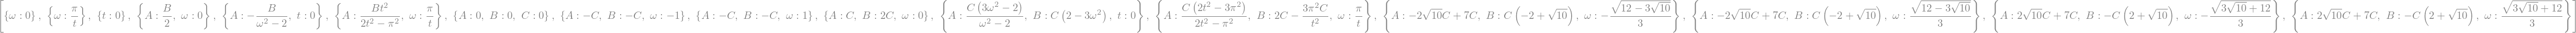

In [8]:
Loes_Eigen=solve(eqs_eigen)
Loes_Eigen

und erhalten drei nicht-triviale Eigenschwingungen.

In [9]:
u_init_e1 = [1,1,-1]
u_init_e2 = [7-2*np.sqrt(10),np.sqrt(10)-2,1]
u_init_e3 = [(7+2*np.sqrt(10))*0.1,-(np.sqrt(10)+2)*0.1,0.1]

Diese stellen wir im Folgenden als Animation dar.

### Darstellung der Eigenschwingungen
##### 1.  Eigenfrequenz / Eigenschwingung

Zum numerischen Lösen benutzen wir das Python-Modul <A href="https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide" target="_blank">SciPy</A>, welches eine breite Kollektion von mathematischen Algorithmen und Funktionen bereitstellt. Im Speziellen werden wir in diesem Semester die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp" target="_blank">'solve_ivp(...)'</A> verwenden, die sich im Untermodul <A href="https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">'scipy.integrate'</A> befindet, welches Funktionen zum Lösen von gewöhnlichen Differentialgleichungen bereitstellt.

Wir definieren uns das System der DGLs als eine Funktion. Wir verwenden hier schon die allgemeine Darstellung für eine beliebige Anzahl von Perlen.

In [10]:
def DGLsys(t,u_vec):
    du_dt = []
    for i in range(0,n):
        du_dt.append(u_vec[n+i])
    du_dt.append(1/m[0]*(u_vec[1] - 2*u_vec[0]))
    for i in range(n+1,2*n-1):
        du_dt.append(1/m[i-n]*(u_vec[i-n-1] - 2*u_vec[i-n] + u_vec[i-n+1]))
    du_dt.append(1/m[n-1]*(u_vec[n-2]-2*u_vec[n-1]))
    return du_dt

Wir setzen nun die Anzahl und die Massen der Perlen fest und definieren uns den Anfangswert der 1. Eigenschwingung.

In [11]:
n=3
m = [1,2,3]

u_init = u_init_e1
for i in range(0,n):
    u_init.append(0)

Wir lösen nun das System numerisch in Python und stellen uns die Lösung in einer Animation dar.

In [12]:
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML

In [13]:
t_end=20
fehler = 10**(-13)
N=100000
t_val = np.linspace(0, t_end, N+1)
Loes_e1 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

In [14]:
Loes = Loes_e1
step = int(N/150)
r_p =30
fig = plt.figure()
ax = fig.gca()
y_Min=np.min(Loes.y)*1.1
y_Max=np.max(Loes.y)*1.1

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p*m[n-1], marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p*m[l-1], marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

##### 2.  Eigenfrequenz / Eigenschwingung

Für die zweite Eigenschwingung erhalten wir:

In [15]:
u_init = u_init_e2
for i in range(0,n):
    u_init.append(0)

Loes_e2 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

In [16]:
Loes = Loes_e2
fig = plt.figure()
ax = fig.gca()
y_Min=np.min(Loes.y)*1.1
y_Max=np.max(Loes.y)*1.1

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p*m[n-1], marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p*m[l-1], marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

##### 3.  Eigenfrequenz / Eigenschwingung

Für die dritte Eigenschwingung erhalten wir:

In [17]:
u_init = u_init_e3
for i in range(0,n):
    u_init.append(0)

Loes_e3 = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

In [18]:
Loes = Loes_e3
fig = plt.figure()
ax = fig.gca()
y_Min=np.min(Loes.y)*1.1
y_Max=np.max(Loes.y)*1.1

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p*m[n-1], marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p*m[l-1], marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

### Vergleich mit der C++ Lösung

Wir vergleichen nun die Python Simulation mit den Ergebnissen des C++ Programms. Das Programm und die zugehörige Header Datei finden Sie unter den folfenden Links: <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/Uebung2025/L11/SchwingendeKette_Klasse.cpp" target="_blank">SchwingendeKette_Klasse.cpp</A> und <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/Uebung2025/L11/SchwingendeKette_Klasse.hpp" target="_blank">SchwingendeKette_Klasse.hpp</A> .

##### 1.  Eigenfrequenz / Eigenschwingung

Wir lesen uns die Lösungen des C++ Programms ein.

In [19]:
data = np.genfromtxt("./Kette_3P_e1.dat")

In [20]:
import matplotlib.gridspec as gridspec
# Bildabmessungen usw.
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

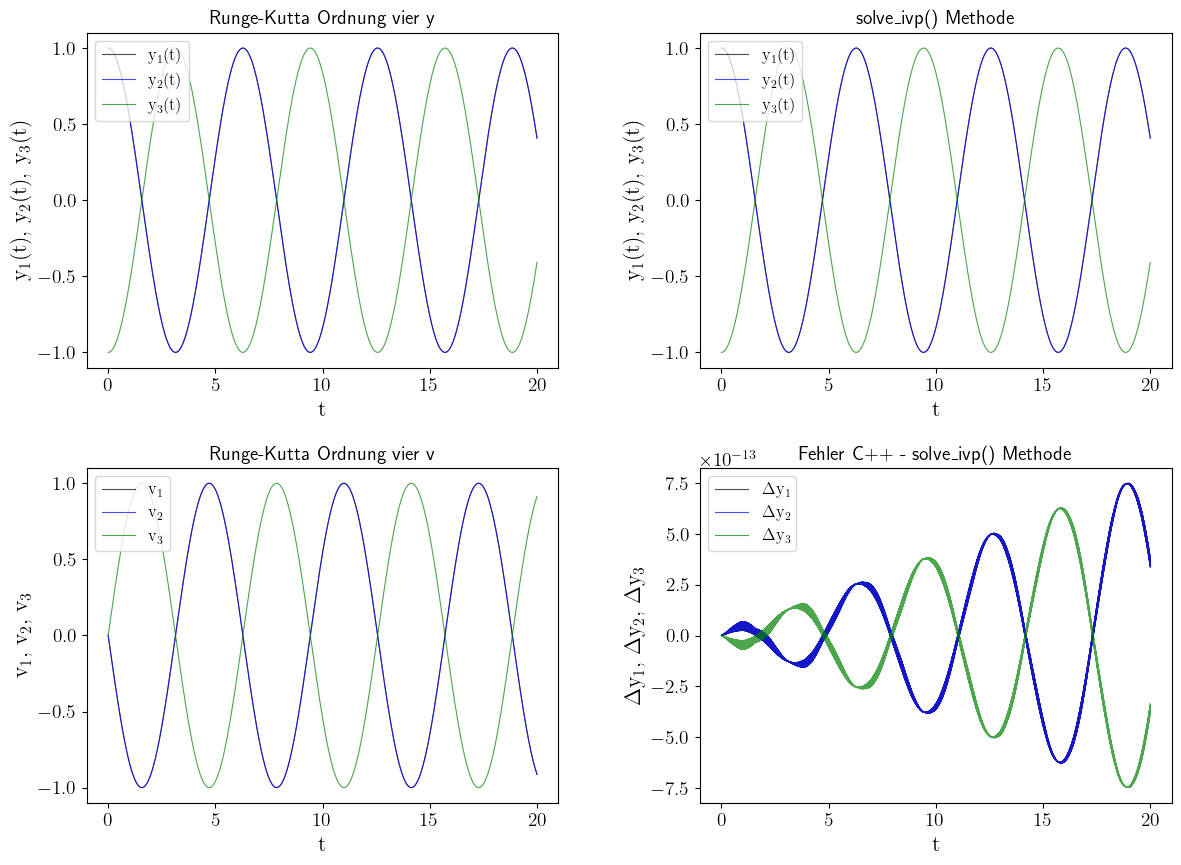

In [21]:
Loes = Loes_e1
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Runge-Kutta Ordnung vier y')              # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax2.set_title(r'solve_ivp() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax3.set_title(r'Runge-Kutta Ordnung vier v')       # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm v_1, \, v_2, \, v_3$")
ax4.set_title(r'Fehler C++ - solve_ivp() Methode')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_3$")

l_width = 0.8                                          # Festlegung der Plot-Liniendicke  
alp = 0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')
ax1.plot(data[:,1],data[:,6], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_3(t)$')

ax2.plot(Loes.t, Loes.y[0],c="black", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(Loes.t, Loes.y[1],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");
ax2.plot(Loes.t, Loes.y[2],c="green", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_3(t)$");

ax3.plot(data[:,1],data[:,3], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_1$') 
ax3.plot(data[:,1],data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_2$') 
ax3.plot(data[:,1],data[:,7], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_3$') 

ax4.plot(data[:,1],data[:,2]-Loes.y[0], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax4.plot(data[:,1],data[:,4]-Loes.y[1], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax4.plot(data[:,1],data[:,6]-Loes.y[2], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_3$') 

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

##### 2.  Eigenfrequenz / Eigenschwingung

In [22]:
data = np.genfromtxt("./Kette_3P_e2.dat")

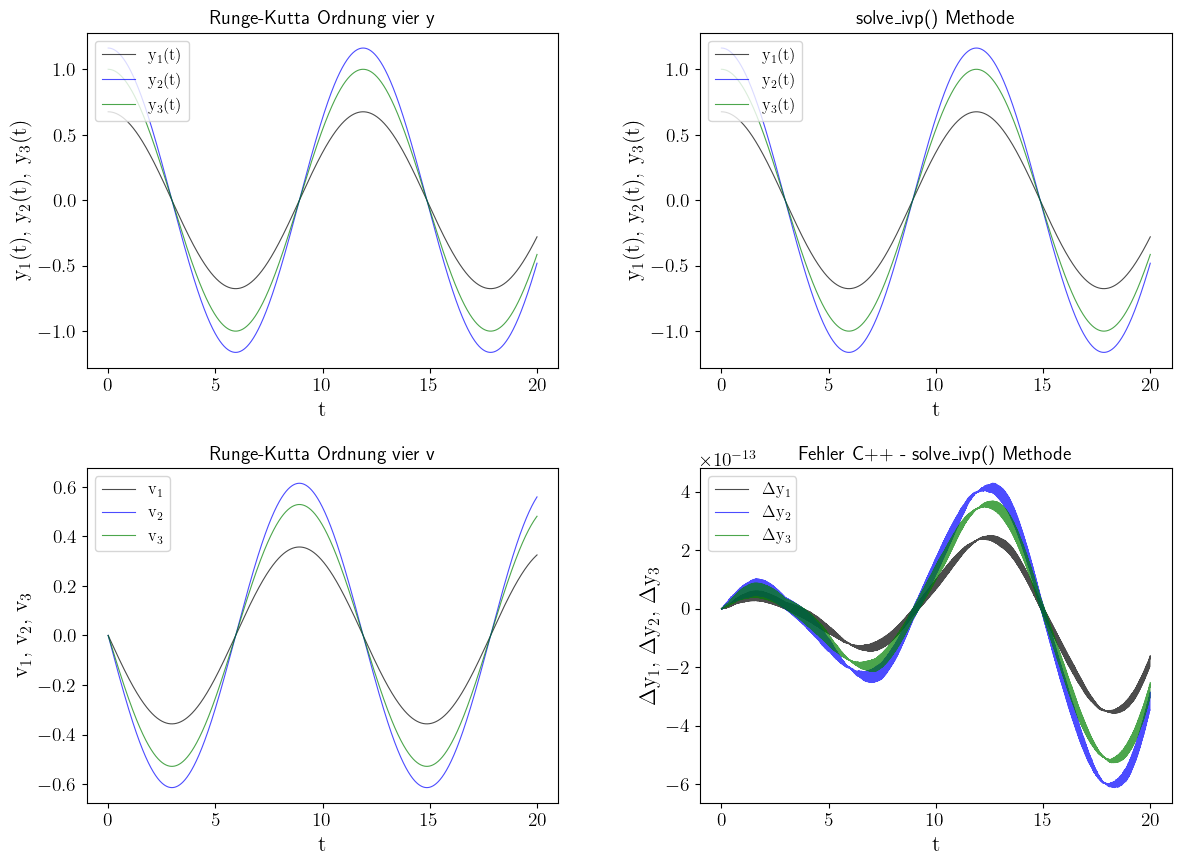

In [23]:
Loes = Loes_e2
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Runge-Kutta Ordnung vier y')              # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax2.set_title(r'solve_ivp() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax3.set_title(r'Runge-Kutta Ordnung vier v')       # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm v_1, \, v_2, \, v_3$")
ax4.set_title(r'Fehler C++ - solve_ivp() Methode')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_3$")

l_width = 0.8                                          # Festlegung der Plot-Liniendicke  
alp = 0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')
ax1.plot(data[:,1],data[:,6], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_3(t)$')

ax2.plot(Loes.t, Loes.y[0],c="black", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(Loes.t, Loes.y[1],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");
ax2.plot(Loes.t, Loes.y[2],c="green", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_3(t)$");

ax3.plot(data[:,1],data[:,3], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_1$') 
ax3.plot(data[:,1],data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_2$') 
ax3.plot(data[:,1],data[:,7], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_3$') 

ax4.plot(data[:,1],data[:,2]-Loes.y[0], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax4.plot(data[:,1],data[:,4]-Loes.y[1], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax4.plot(data[:,1],data[:,6]-Loes.y[2], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_3$') 

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

##### 3.  Eigenfrequenz / Eigenschwingung

In [24]:
data = np.genfromtxt("./Kette_3P_e3.dat")

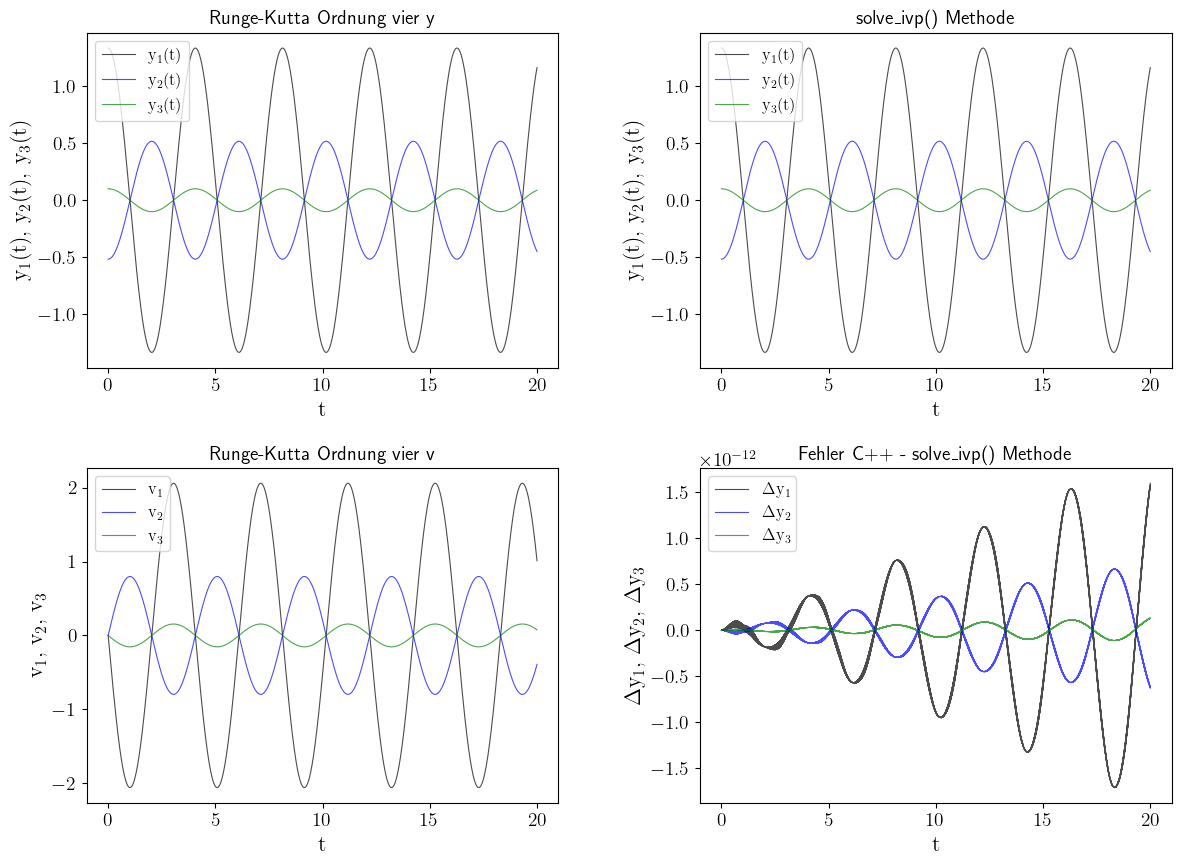

In [25]:
Loes = Loes_e3
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Runge-Kutta Ordnung vier y')              # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax2.set_title(r'solve_ivp() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_3(t)$")
ax3.set_title(r'Runge-Kutta Ordnung vier v')       # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm v_1, \, v_2, \, v_3$")
ax4.set_title(r'Fehler C++ - solve_ivp() Methode')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_3$")

l_width = 0.8                                          # Festlegung der Plot-Liniendicke  
alp = 0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')
ax1.plot(data[:,1],data[:,6], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_3(t)$')

ax2.plot(Loes.t, Loes.y[0],c="black", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(Loes.t, Loes.y[1],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");
ax2.plot(Loes.t, Loes.y[2],c="green", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_3(t)$");

ax3.plot(data[:,1],data[:,3], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_1$') 
ax3.plot(data[:,1],data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_2$') 
ax3.plot(data[:,1],data[:,7], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_3$') 

ax4.plot(data[:,1],data[:,2]-Loes.y[0], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax4.plot(data[:,1],data[:,4]-Loes.y[1], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax4.plot(data[:,1],data[:,6]-Loes.y[2], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_3$') 

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

Zusammengefasst kann man sagen, dass die Simulationen in Python und C++ sehr gut miteinander übereinstimmen.

## 10 Perlen mit unterschiedlichen Massen 

Wir betrachten nun eine Kette bestehend aus 10 Perlen mit ansteigenden Massenwerten ($m_1=1, m_2=2, ..., m_{10}=10$). Zum Anfangszeitpunkt $t=0$ werden die Perlen aus ihrer Ruhelage wie folgt angestoßen: $\frac{d y_1(0)}{dt} = \frac{1}{1}, \frac{d y_2(0)}{dt} = \frac{1}{2}, ..., \frac{d y_{10}(0)}{dt} = \frac{1}{10}$

In [26]:
n=10
m = []
u_init = []
for i in range(0,n):
    m.append(i+1)
    u_init.append(0)
for i in range(0,n):
    u_init.append(1/m[i])

In [27]:
t_end=100
fehler = 10**(-13)
N=100000
t_val = np.linspace(0, t_end, N+1)
Loes = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

Wir vergleichen die Lösung zunächst mit den Ergebnissen des C++ Programmes und stellen, der Übersichtlichkeit halber nur die Bewegungen der ersten, zweiten und 10. Perle dar.

In [28]:
data = np.genfromtxt("./Kette_10P.dat")

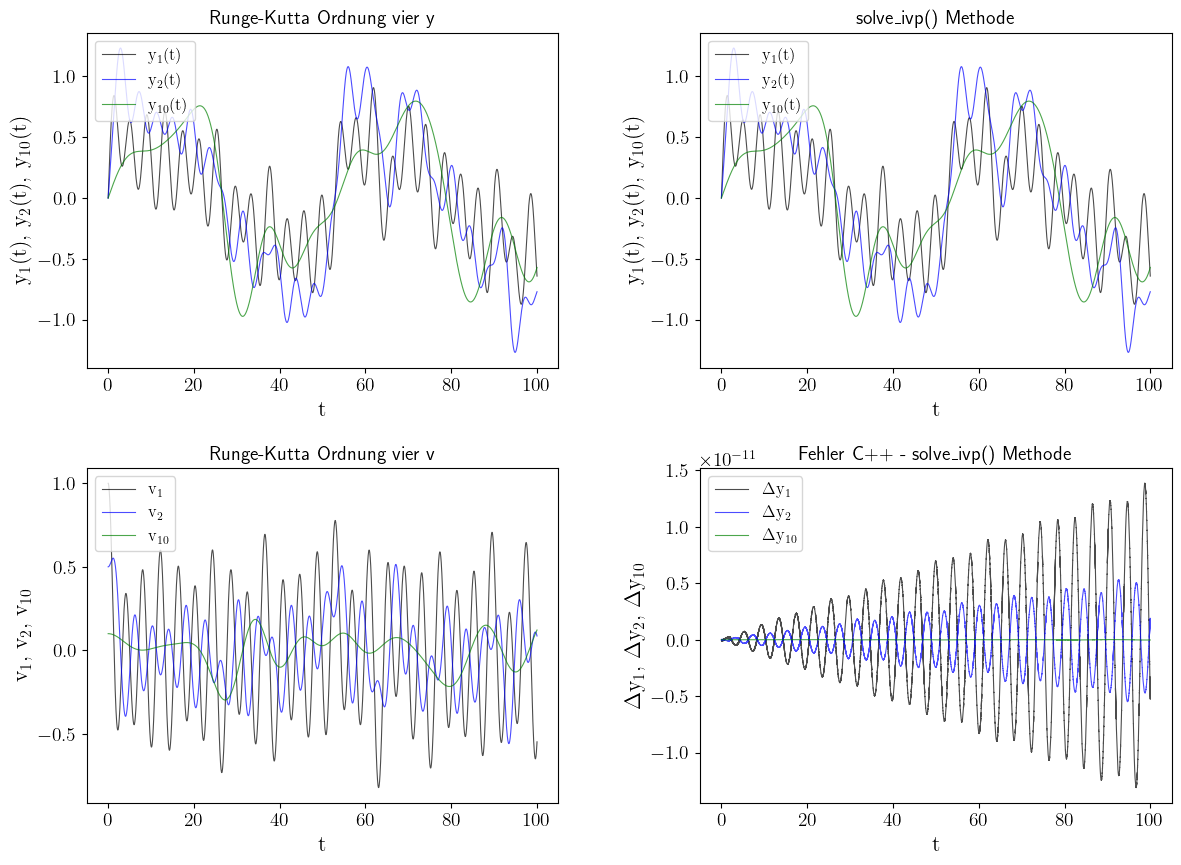

In [29]:
fig = plt.figure()                                                        # Hauptbild
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  # Anordnung der vier Unterbilder
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title(r'Runge-Kutta Ordnung vier y')              # Titel der Abbildung in ax1
ax1.set_xlabel(r"$\rm t$")
ax1.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_{10}(t)$")
ax2.set_title(r'solve_ivp() Methode')                   # Titel der Abbildung in ax2 
ax2.set_xlabel(r"$\rm t$")
ax2.set_ylabel(r"$\rm y_1(t), \, y_2(t), \, y_{10}(t)$")
ax3.set_title(r'Runge-Kutta Ordnung vier v')       # Titel der Abbildung in ax3  
ax3.set_xlabel(r"$\rm t$")
ax3.set_ylabel(r"$\rm v_1, \, v_2, \, v_{10}$")
ax4.set_title(r'Fehler C++ - solve_ivp() Methode')           # Titel der Abbildung in ax4  
ax4.set_xlabel(r"$\rm t$")
ax4.set_ylabel(r"$\rm \Delta y_1, \, \Delta y_2, \, \Delta y_{10}$")

l_width = 0.8                                          # Festlegung der Plot-Liniendicke  
alp = 0.7                                              # Festlegung der Transparenz der Kurven

ax1.plot(data[:,1],data[:,2], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_1(t)$')
ax1.plot(data[:,1],data[:,4], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_2(t)$')
ax1.plot(data[:,1],data[:,20], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm y_{10}(t)$')

ax2.plot(Loes.t, Loes.y[0],c="black", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_1(t)$");
ax2.plot(Loes.t, Loes.y[1],c="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_2(t)$");
ax2.plot(Loes.t, Loes.y[9],c="green", linewidth=l_width, linestyle='-', alpha=alp, label=r"$\rm y_{10}(t)$");

ax3.plot(data[:,1],data[:,3], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_1$') 
ax3.plot(data[:,1],data[:,5], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_2$') 
ax3.plot(data[:,1],data[:,21], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm v_{10}$') 

ax4.plot(data[:,1],data[:,2]-Loes.y[0], color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_1$') 
ax4.plot(data[:,1],data[:,4]-Loes.y[1], color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_2$') 
ax4.plot(data[:,1],data[:,20]-Loes.y[9], color="green", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm \Delta y_{10}$') 

ax1.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax1
ax2.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax2
ax3.legend(frameon=True, loc="upper left",fontsize=12)  # Anordnung der Legende auf ax3
ax4.legend(frameon=True, loc="upper left",fontsize=12); # Anordnung der Legende auf ax4

Zusammengefasst kann man sagen, dass die Simulationen in Python und C++ wieder sehr gut miteinander übereinstimmen.

Wir stellen nun die Simulationsergebnisse in einer Animation dar.

In [30]:
params = {
    'figure.figsize'    : [10,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

In [31]:
step = int(N/150)
r_p =20
fig = plt.figure()
ax = fig.gca()
y_Min=np.min(Loes.y)*1.05
y_Max=np.max(Loes.y)*1.05

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p*m[n-1], marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p*m[l-1], marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())

## 100 Perlen mit unterschiedlichen Massen 

Wir betrachten nun eine Simulation mit $n=100$ Perlen und unterschiedlicher Massenwerte. Die Massenwerte der Perlen sollen sich dabei wieder wie folgt über die Kette verteilen $m_1=1, m_2=2, ..., m_{100}=100$). Die Anfangsauslenkung der Kette sei so gewählt, dass sie im mittleren Bereich in positive Richtung wie eine Gauß-Verteilung ausgelenkt sei und die Perlen zum Zeitpunkt $t=0$ nicht angestoßen werden.

In [32]:
n=100
m = []
u_init = []
for i in range(0,n):
    m.append(i+1)
    u_init.append(np.exp(-1/2*((i-50)/5)**2))
for i in range(0,n):
    u_init.append(0)

In [33]:
t_end=1500
fehler = 10**(-13)
N=100000
t_val = np.linspace(0, t_end, N+1)
Loes = solve_ivp(DGLsys, [0, t_end], u_init, t_eval=t_val, rtol=fehler, atol=fehler)

In [34]:
step = int(N/150)
r_p =2
fig = plt.figure()
ax = fig.gca()
y_Min=np.min(Loes.y)*1.05
y_Max=np.max(Loes.y)*1.05

def animate(i):
    ax.cla()
    ax.plot([0,1],[0,Loes.y[0][step*i]], c="grey")
    ax.plot([n,n+1],[Loes.y[n-1][step*i],0], c="grey")
    ax.scatter(n, Loes.y[n-1][step*i], s=r_p*m[n-1], marker='o', c="blue")
    for l in range(1,n):
        ax.scatter(l, Loes.y[l-1][step*i], s=r_p*m[l-1], marker='o', c="blue")
        ax.plot([l,l+1],[Loes.y[l-1][step*i],Loes.y[l][step*i]], c="grey")
    ax.set_xlim(0, n+1)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=150,interval=100)
plt.close(ani._fig)
HTML(ani.to_html5_video())